# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import math

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

Answers to questions:

1 - Hypothesis testing is appropriate for this problem.  CLT does apply since sample sizes are large (2435).

2 - Null Hypothesis is that perceived race doesn't impact callback chances and the observed difference between black and white call back rates can be due to random sampling error.
Alternate Hypotheses is that race does impact callback rates and that the observed difference is unlikely to be caused by random sampling error.

3 - Observed callback rate difference between white and black = .032
    Margin of Error = 0.015
    95% Confidence Interval that Null Hypothesis is true = 0 +/- 0.015
    P-value = < .001

4 - Story:  If null hypotheses is true then the difference in white and black callback ratios would likely be within the 95% confidence interval of 0 +/- 0.015.  Since the actual sample difference in call back rates is well outside the confidence interval (0.032) we reject the null hypotheses.  We conclude that the call back rate difference is significant and real.

5 - Unknown if race is the most important factory.  Other factors may be significant as well.  Need to do hypotheses testing on all possible factors and then rank p-values for each factor to see which is most significant.  May also need to factor in additional factors like employer location.  It is not clear if all possible significant factors where considered and recorded in this data set.

In [23]:
# number of samples and callbacks for black and white sounding names
black = data[data.race=='b']
white = data[data.race=='w']
P_b = sum(data[data.race=='b'].call)/black['race'].count()  #ratio of callbacks for black group
P_w = sum(data[data.race=='w'].call)/white['race'].count()  #ratio of callbacks for white group
print('Number of black sounding resumes and callbacks and ratio: ', black['race'].count(), sum(data[data.race=='b'].call), P_b)
print('Number of black sounding resumes and callbacks and ratio: ', white['race'].count(), sum(data[data.race=='w'].call), P_w)
print('education means of white and black', white['education'].mean(), black['education'].mean())
print('yearsexp means of white and black', white['yearsexp'].mean(), black['yearsexp'].mean())
print('honors means of white and black', white['honors'].mean(), black['honors'].mean())

Number of black sounding resumes and callbacks and ratio:  2435 157.0 0.064476386037
Number of black sounding resumes and callbacks and ratio:  2435 235.0 0.0965092402464
education means of white and black 3.62094455852 3.6160164271
yearsexp means of white and black 7.85626283368 7.8295687885
honors means of white and black 0.0542094455852 0.0513347022587


In [24]:
# Compute combined standard deviation of the 2 samples, Margin of Error, 95% confidence interval, Z score
P_std = math.sqrt((P_b*(1-P_b)/2435) + (P_w*(1-P_w)/2435))
print('Difference in ratios of callbacks = ', P_w - P_b)
print('Pooled Std: ', P_std)
print('Margin of Error: ', 1.96*P_std)
print('95% confidence interval that the difference is random: +/-', 1.96*P_std)
print('Z score of difference =', (P_w - P_b)/P_std )

Difference in ratios of callbacks =  0.0320328542094
Pooled Std:  0.0077833705866767544
Margin of Error:  0.015255406349886438
95% confidence interval that the difference is random: +/- 0.015255406349886438
Z score of difference = 4.11555043573


In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


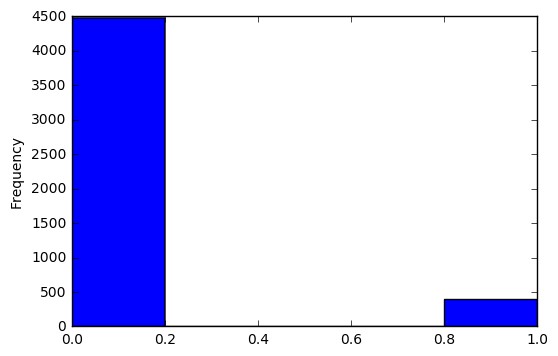

In [22]:
# Histogram of call back column
data['call'].plot.hist(bins=5)